# COMP 4605.1 Data Mining - Final Project - Price Prediction 
### Part 2 (Car Dataset)

Rana Selim - 19COMP1009 
______________________________________________________________________________________


# ----- DATA CLEANING ----- #

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [2]:
df= pd.read_csv('../Final Project/CarData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df = df.fillna('0')

In [6]:
print(df.columns.tolist())

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']



# ----- Rename Data Frame Columns ----- #


In [7]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## Fixing spelling errors in CompanyName column

In [9]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df.drop('car_ID', inplace=True, axis=1)
df.drop('symboling', inplace=True, axis=1)
df.drop('aspiration', inplace=True, axis=1)
df.drop('carbody', inplace=True, axis=1)
df.drop('enginelocation', inplace=True, axis=1)
df.drop('wheelbase', inplace=True, axis=1)
df.drop('carlength', inplace=True, axis=1)
df.drop('carwidth', inplace=True, axis=1)
df.drop('carheight', inplace=True, axis=1)
df.drop('curbweight', inplace=True, axis=1)
df.drop('citympg', inplace=True, axis=1)
df.drop('highwaympg', inplace=True, axis=1)
df.drop('fuelsystem', inplace=True, axis=1)
df.drop('boreratio', inplace=True, axis=1)
df.drop('enginetype', inplace=True, axis=1)
df.drop('stroke', inplace=True, axis=1)
df.drop('compressionratio', inplace=True, axis=1)
df.drop('doornumber', inplace=True, axis=1)
print(df)

     CompanyName fueltype drivewheel cylindernumber  enginesize  horsepower  \
0    alfa-romero      gas        rwd           four         130         111   
1    alfa-romero      gas        rwd           four         130         111   
2    alfa-romero      gas        rwd            six         152         154   
3           audi      gas        fwd           four         109         102   
4           audi      gas        4wd           five         136         115   
..           ...      ...        ...            ...         ...         ...   
200        volvo      gas        rwd           four         141         114   
201        volvo      gas        rwd           four         141         160   
202        volvo      gas        rwd            six         173         134   
203        volvo   diesel        rwd            six         145         106   
204        volvo      gas        rwd           four         141         114   

     peakrpm    price  
0       5000  13495.0  
1  

In [11]:
df.describe()

,enginesize,horsepower,peakrpm,price
count,205.000000,205.000000,205.000000,205.000000
mean,126.907317,104.117073,5125.121951,13276.710571
std,41.642693,39.544167,476.985643,7988.852332
min,61.000000,48.000000,4150.000000,5118.000000
25%,97.000000,70.000000,4800.000000,7788.000000
50%,120.000000,95.000000,5200.000000,10295.000000
75%,141.000000,116.000000,5500.000000,16503.000000
max,326.000000,288.000000,6600.000000,45400.000000


In [12]:
df.corr()

,enginesize,horsepower,peakrpm,price
enginesize,1.000000,0.809769,-0.244660,0.874145
horsepower,0.809769,1.000000,0.131073,0.808139
peakrpm,-0.244660,0.131073,1.000000,-0.085267
price,0.874145,0.808139,-0.085267,1.000000


# ----- Visualize  ----- #

* Correlation is used in linear regression models to determine the strength of the relationship between the dependent and independent variables. 
* The linear regression model is a machine learning algorithm that is used to predict a continuous value, such as a price or quantity. 
* The linear regression model uses the correlation between the dependent and independent variables to determine how much of the dependent variable is explained by the independent variable. 

<AxesSubplot:>

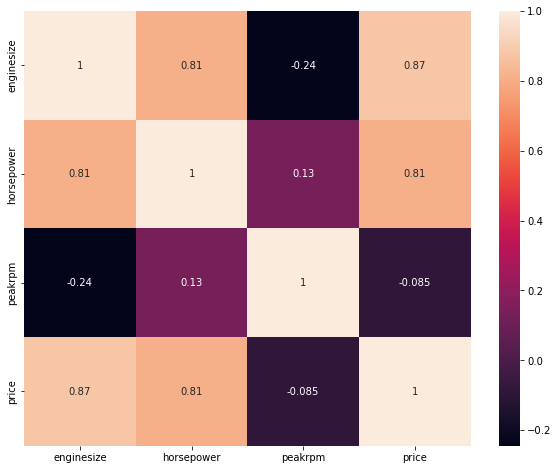

In [13]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True)

## Drive Wheel Count

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

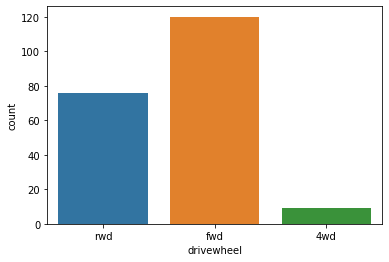

In [14]:
sb.countplot(x = 'drivewheel', data = df)

## Fuel Type Count

<AxesSubplot:xlabel='fueltype', ylabel='count'>

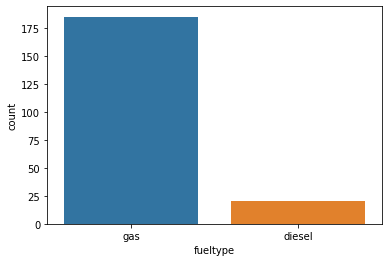

In [15]:
sb.countplot(x = 'fueltype', data = df)

## Cylinder Number Count

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

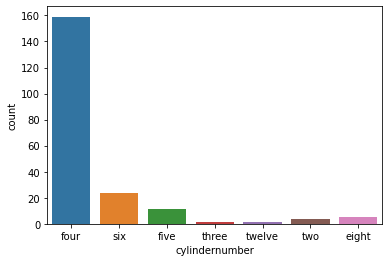

In [16]:
sb.countplot(x = 'cylindernumber', data = df)

## Brand Count

<AxesSubplot:xlabel='count', ylabel='CompanyName'>

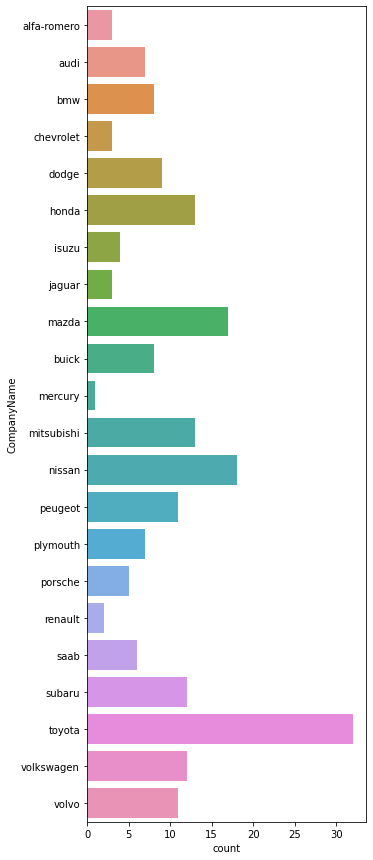

In [17]:
plt.figure(figsize=(5,15))
sb.countplot(y = 'CompanyName', data = df)

## Price X Horsepower X Drive Wheel

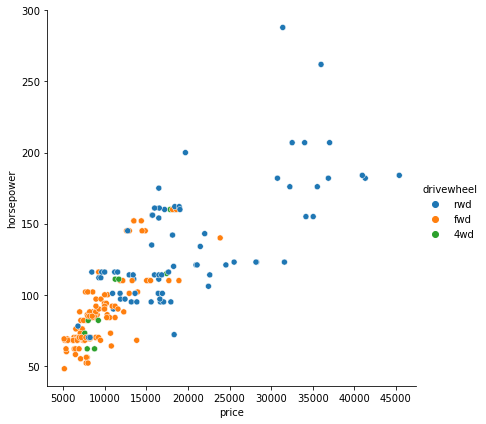

In [18]:
sb.relplot(x="price", y="horsepower", height=6,hue="drivewheel",data=df)

## Price X Horsepower X Cylinder Number

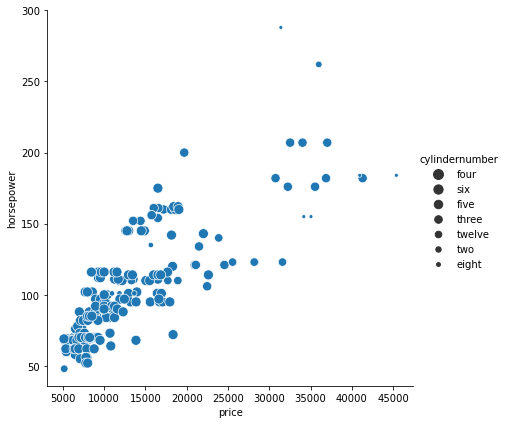

In [19]:
sb.relplot(x="price", y="horsepower",size="cylindernumber", height=6,sizes=(15, 100),data=df)

## Price X Engine Size X Drive Wheel

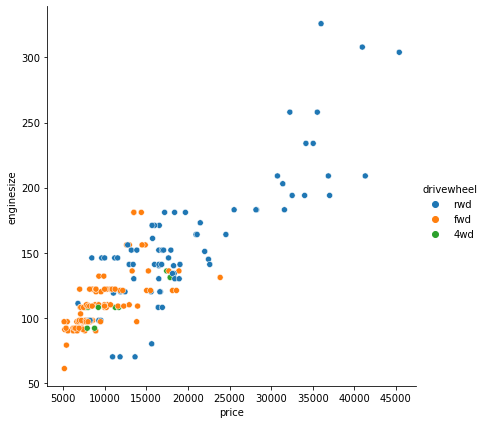

In [20]:
sb.relplot(x="price", y="enginesize", height=6,hue="drivewheel",data=df)

## Pairplot of Data

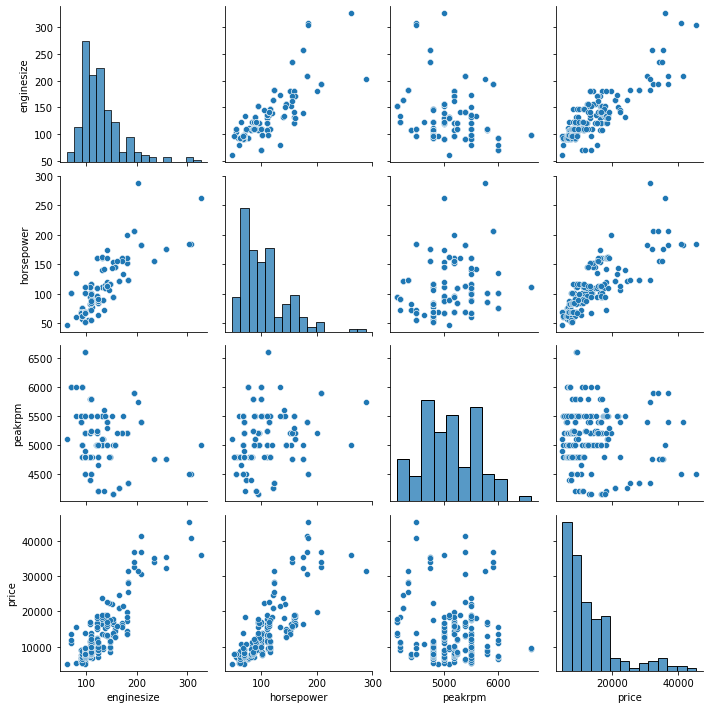

In [21]:
col = ['enginesize','horsepower','peakrpm','price']
sb.pairplot(df[col])

## Price X Brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'mazda'),
  Text(9, 0, 'buick'),
  Text(10, 0, 'mercury'),
  Text(11, 0, 'mitsubishi'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'peugeot'),
  Text(14, 0, 'plymouth'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'renault'),
  Text(17, 0, 'saab'),
  Text(18, 0, 'subaru'),
  Text(19, 0, 'toyota'),
  Text(20, 0, 'volkswagen'),
  Text(21, 0, 'volvo')])

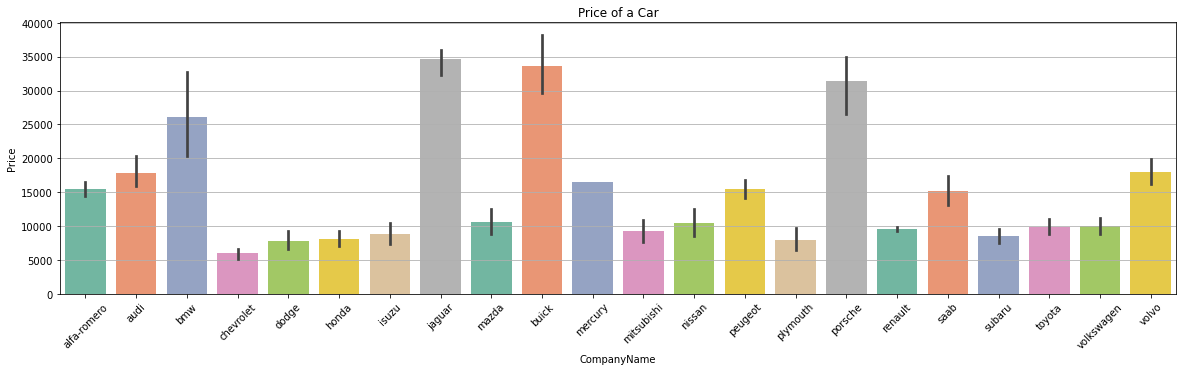

In [22]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='CompanyName',y='price',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('CompanyName')
plt.grid(axis='y')
plt.ylabel('Price')
plt.xticks(rotation=45)


# Conclusions

* Most of the cars are "Front Wheel Drive" and has fuel type as "Gas".
* Least of the cars are "4 Wheel Drive" and has fuel type as "Diesel".
* Toyota has the most EVs than any other manufacturer in this dataset.

In [23]:
numerical_cols = df.select_dtypes(exclude=['object']).columns


df[numerical_cols].head(2)


,enginesize,horsepower,peakrpm,price
0,130,111,5000,13495.0
1,130,111,5000,16500.0


## Fitting all features with price

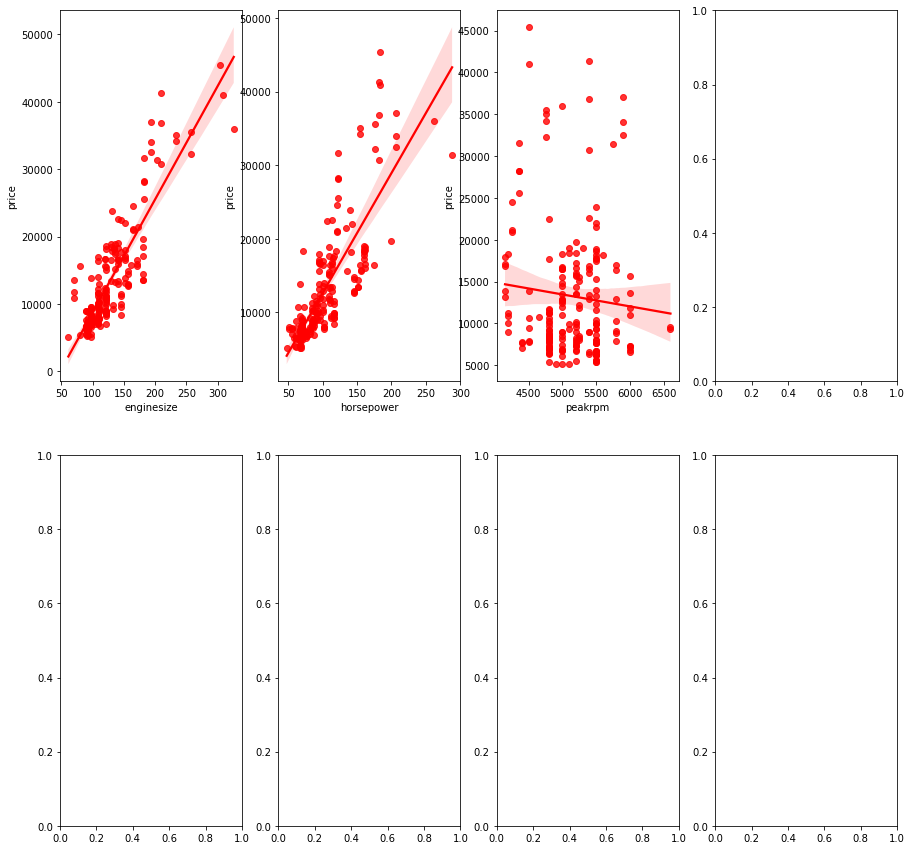

In [24]:
fig,axes = plt.subplots(2,4,figsize=(15,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sb.regplot(x=col, y='price' ,data=df,ax=axes[x][y],color='r')

What data says according to price:

* Engine size is averagely distributed over the interval of [100-150] .
* Horsepower is averagely distributed over the interval of [50-130] .

# ----- Linear Regression ----- #

### Get Data Ready For Training a Linear Regression Model

Let’s now begin to train out the regression model. 
We will need to first split up our data into an X list that contains the features to train on, 
and a y list with the target variable, in this case, the Price column. 
We will ignore other columns because they only have text which is not useful for linear regression modeling.

In [25]:
x = df[['enginesize','horsepower','peakrpm']]
y = df['price']

### Split Data into Train, Test

Now we will split our dataset into a training set and testing set using sklearn train_test_split(). the training set will be going to use for training the model and testing set for testing the model. We are creating a split of 40% training data and 60% of the training set.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101) 

X_train and y_train contain data for the training model. X_test and y_test contain data for the testing model. X and y are features and target variable names.

### Creating and Training the LinearRegression Model

We will import and create sklearn linearmodel LinearRegression object and fit the training dataset in it.

In [27]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression()

In [28]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

LinearRegression()

### LinearRegression Model Evaluation

Now let’s evaluate the model by checking out its coefficients and how we can interpret them.

In [29]:
print(lm.intercept_)

-10770.841315460357


In [30]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
enginesize,120.426456
horsepower,50.381478
peakrpm,0.682139


What does coefficient of data says:

* Holding all other features fixed, a 1 unit increase in Engine size is associated with an increase of €120.42 .
* Holding all other features fixed, a 1 unit increase in Horsepower is associated with an increase of €50.38 .
* Holding all other features fixed, a 1 unit increase in Peak rpm is doesn't effect price at all.

### Predictions from our Linear Regression Model

In [31]:
predictions = lm.predict(X_test) 

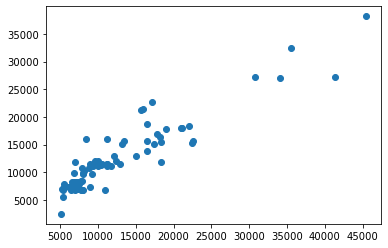

In [32]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data starts with a line form and spread linearly with price which means our model has done good predictions at only interval of [0-15000].  Because of that error numbers will be really high according to total.

### Regression Evaluation Metrics

Here are two common evaluation metrics for regression problems:

* Mean Squared Error (MSE)
MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.
* Root Mean Squared Error (RMSE)
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. 

In [33]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MSE: 10370404.922710879
RMSE: 3220.3113083537246
